In [6]:
import random
from PIL import Image, ImageDraw, ImageFilter
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
import skimage.measure

In [ ]:
n = 10000

In [7]:
width, height = 81, 81
image = Image.new("1", (width, height), 0)
draw = ImageDraw.Draw(image)
x1, y1 = 0, random.randint(height//3, height//1.5)
x2, y2 = width-1, random.randint(height//3, height//1.5)
draw.line((x1, y1, x2, y2), fill=1 , width=1)
image.save("random_line_image.png")
convolved_image = Image.open(r"random_line_image.png").convert('RGB')
rad = 10
convolved_image = convolved_image.filter(ImageFilter.GaussianBlur(radius=rad))   
convolved_image.save("convolved_image.png")
convolved_array = 2.5*rad*np.array(convolved_image.convert('L'))

In [10]:
small_array = skimage.measure.block_reduce(convolved_array, (27,27), np.average)

In [12]:
mean = 0
var = 256
sigma = var ** 0.5
gauss = np.random.normal(mean, sigma, small_array.shape)
gauss = gauss.reshape(small_array.shape)
noisy = small_array + gauss

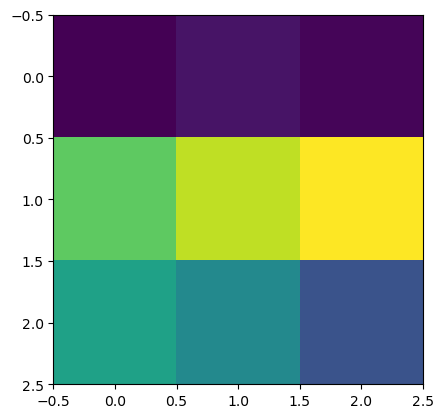

In [13]:
plt.imshow(noisy)
plt.show()